In [1]:
import Pkg; Pkg.activate(".")

  Activating project at `~/Work/HPEC2022_ContractionTrees`


In [5]:
using Plots, DataFrames, CSV, StatsPlots, LaTeXStrings

┌ Info: Precompiling DataFrames [a93c6f00-e57d-5684-b7b6-d8193f3e46c0]
└ @ Base loading.jl:1423
┌ Info: Precompiling StatsPlots [f3b207a7-027a-5e70-b257-86293d7955fd]
└ @ Base loading.jl:1423
┌ Warning: Module Plots with build ID 214227238519443 is missing from the cache.
│ This may mean Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1107
┌ Info: Skipping precompilation since __precompile__(false). Importing StatsPlots [f3b207a7-027a-5e70-b257-86293d7955fd].
└ @ Base loading.jl:1124


In [6]:
data = DataFrame(CSV.File("./tw_variance - Sheet5.csv"));
names(data)

18-element Vector{String}:
 "Column1"
 "CotengraFLOPS"
 "OrderFLOPS"
 "OrderEdge"
 "CotengraEdge"
 "OrderVertex"
 "Tamaki5s"
 "Tamaki300s"
 "FlowCutter"
 "CotengraFLOPSUnbounded"
 "CotengraEdgeUnbounded"
 "Column12"
 "Column13"
 "Column14"
 "Column15"
 "Column16"
 "Column17"
 "Column18"

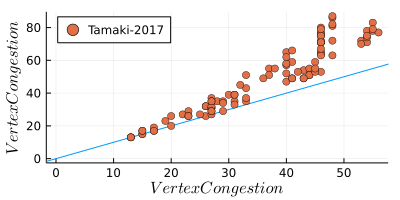

In [7]:
begin
    plt = plot(; size=(400, 200))
    Plots.abline!(plt, 1, 0; label="")
    @df data scatter!(plt, :OrderVertex[1:100], :Tamaki5s[1:100]; 
        legend=:topleft, 
        label="Tamaki-2017", 
        ylabel=L"Vertex Congestion", 
        xlabel=L"Vertex Congestion",
    )
    savefig(plt, "tamaki5s.pdf")
    plt
end

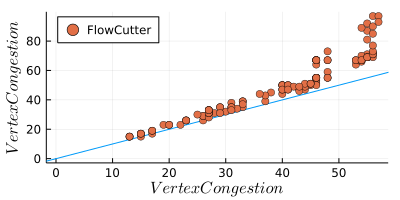

In [8]:
begin
    plt = plot(; size=(400, 200))
    Plots.abline!(plt, 1, 0; label="")
    @df data scatter!(plt, :OrderVertex, :FlowCutter; 
        legend=:topleft, 
        label="FlowCutter", 
        ylabel=L"Vertex Congestion", 
        xlabel=L"Vertex Congestion"
    )
    savefig(plt, "flowcutter.pdf")
    plt
end

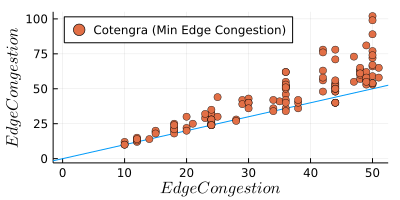

In [9]:
begin
    plt = plot(; size=(400, 200))
    Plots.abline!(plt, 1, 0; label="")
    @df data scatter!(plt, :OrderEdge, :CotengraEdge; 
        legend=:topleft, 
        label="Cotengra (Min Edge Congestion)", 
        ylabel=L"Edge Congestion", 
        xlabel=L"Edge Congestion"
    )
    savefig(plt, "cotengraedge.pdf")
    plt
end

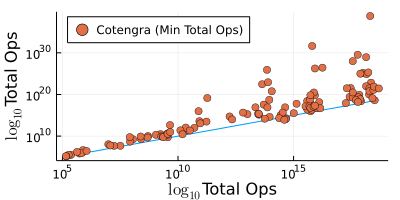

In [10]:
begin
    plt = plot(; size=(400, 200))
    @df data plot!(plt, :OrderFLOPS, :OrderFLOPS; label="")
    @df data scatter!(plt, :OrderFLOPS, :CotengraFLOPS; 
        legend=:topleft, 
        label="Cotengra (Min Total Ops)", 
        ylabel=L"\log_{10}" * "Total Ops", 
        xlabel=L"\log_{10}" * "Total Ops",
        xaxis=:log,
        yaxis=:log
    )
    savefig(plt, "cotengraflops.pdf")
    plt
end

In [21]:
data2 = DataFrame(CSV.File("./tw_variance - Sheet10.csv"));
names(data2)

5-element Vector{String}:
 "Name"
 "Qubits"
 "log(Cost)"
 "Cost"
 "Cotengra"

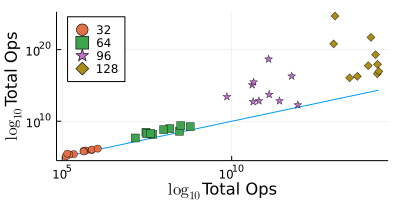

In [29]:
begin
    markers=[:circle, :rect, :star5, :diamond]
    plt = plot(; size=(400, 200))
    @df data2 plot!(plt, :Cost, :Cost; label="")
    for (i, df) in enumerate(groupby(data2, :Qubits))
        @df df scatter!(plt, :Cost, :Cotengra; 
            legend=:topleft, 
            ylabel=L"\log_{10}" * "Total Ops", 
            xlabel=L"\log_{10}" * "Total Ops",
            label = last(:Qubits),
            xaxis=:log,
            yaxis=:log,
            markershape=markers[i]
        )
    end
    savefig(plt, "cotengraflops_qubits.pdf")
    plt
end